In [2]:

library(dplyr)
library(readr)
library(ggplot2)


In [3]:
options(repr.plot.height=5)
options(repr.matrix.max.rows=20)
options(repr.matrix.max.columns=10)

In [33]:
drawplot = function(plot, file=NA, width=5, height=3, ...) {
    if (!is.na(file)) {
        png(paste(file, "png", sep="."), width=width, height=height, units='in', res=600, ...)
        print(plot)
        dev.off()
        pdf(paste(file, "pdf", sep="."), width=width, height=height, ...)
        print(plot)
        dev.off()
    }
    plot
}

In [58]:
usersLK = read_delim("data/lk1m/users.dat", delim=":",
                   col_names=c("user", "gender", "age", "occupation", "zip"),
                   col_types="i_c_c_c_c") %>%
    mutate(gender=as.factor(gender),
           age=as.factor(age),
           occupation=as.factor(occupation),
           DataSet = "ML-1M")

usersLK


user,gender,age,occupation,zip,DataSet
1,F,1,10,48067,ML-1M
2,M,56,16,70072,ML-1M
3,M,25,15,55117,ML-1M
4,M,45,7,02460,ML-1M
5,M,25,20,55455,ML-1M
6,F,50,9,55117,ML-1M
7,M,35,1,06810,ML-1M
8,M,25,12,11413,ML-1M
9,M,25,17,61614,ML-1M
10,F,35,1,95370,ML-1M


In [59]:
#id,key,gender,age

usersLastfm = read_delim("data/lastfm/lastfm-users.csv", delim=",", 
                   col_names=c("user", "key", "gender", "age") )
usersLastfm <-  subset(usersLastfm, select = c("user", "gender", "age"))
#usersLastfm$age <- as.integer(usersLastfm$age)
usersLastfm$age <- as.numeric(as.character(usersLastfm$age))
usersLastfm$gender[usersLastfm$gender == "f"] <- "F"
usersLastfm$gender[usersLastfm$gender == "m"] <- "M"
usersLastfm$age[ as.numeric(usersLastfm$age) < 18] <- 1
usersLastfm$age[as.numeric(usersLastfm$age) >= 18 & as.numeric(usersLastfm$age) < 25] <- 18
usersLastfm$age[as.numeric(usersLastfm$age) >= 25 &  as.numeric(usersLastfm$age) < 35] <- 25
usersLastfm$age[as.numeric(usersLastfm$age) >= 35 &  as.numeric(usersLastfm$age) < 45] <- 35
usersLastfm$age[as.numeric(usersLastfm$age) >= 45 & as.numeric(usersLastfm$age) < 56] <- 45
usersLastfm$age[as.numeric(usersLastfm$age) >= 56 ] <- 56
usersLastfm$DataSet = as.factor("LastFM")
usersLastfm$age = as.factor(usersLastfm$age)
usersLastfm
unique(usersLastfm$age)

Parsed with column specification:
cols(
  user = col_integer(),
  key = col_character(),
  gender = col_character(),
  age = col_integer()
)


user,gender,age,DataSet
1,F,18,LastFM
2,F,NA,LastFM
3,NA,NA,LastFM
4,M,18,LastFM
5,M,25,LastFM
6,M,18,LastFM
7,M,1,LastFM
8,F,18,LastFM
9,F,18,LastFM
10,M,NA,LastFM


[1] 18   <NA> 25   1    45   56   35  
Levels: 1 18 25 35 45 56

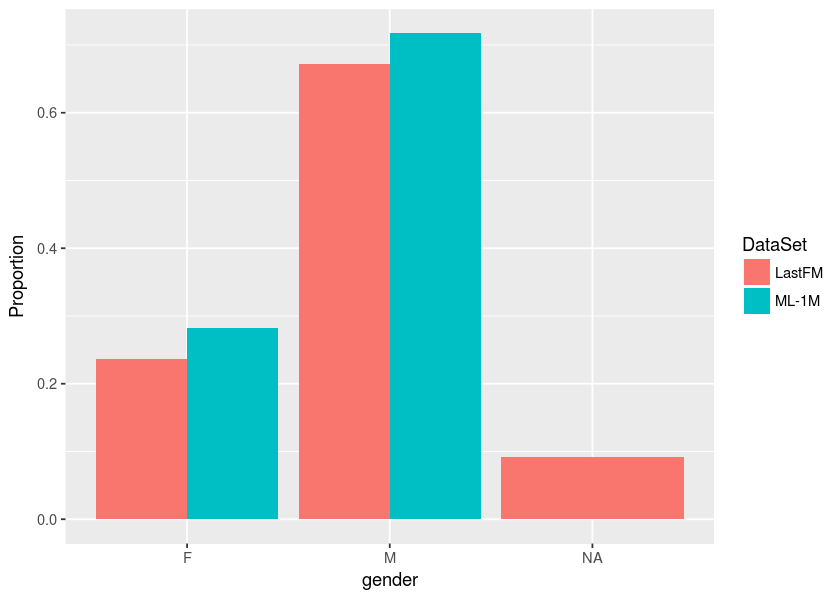

In [64]:
genders.m1=
    usersLK %>%
    group_by(gender) %>%
    summarize(count=n()) %>%
    ungroup() %>%
    mutate(Proportion=count/sum(count), DataSet="ML-1M")
#genders.m1

genders.lfm=
    usersLastfm %>%
    group_by(gender) %>%
    summarize(count=n()) %>%
    ungroup() %>%
    mutate(Proportion=count/sum(count), DataSet="LastFM")
#genders.lfm

genders.all = rbind(genders.m1,genders.lfm)
#genders.all
ggplot(genders.all) +  aes(x=gender,y=Proportion,fill=DataSet) +
geom_bar(stat='identity',position = "dodge")

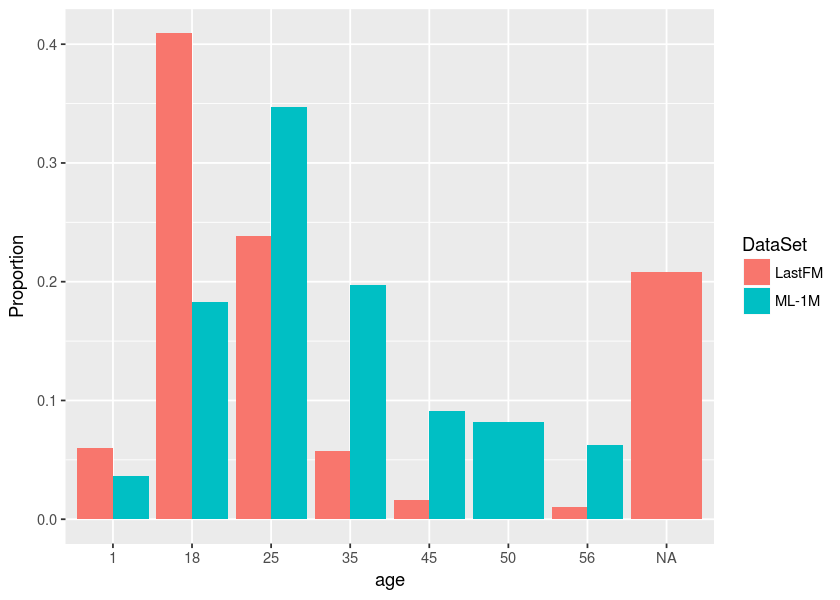

In [65]:
age.m1=
    usersLK %>%
    group_by(age) %>%
    summarize(count=n()) %>%
    ungroup() %>%
    mutate(Proportion=count/sum(count),
           DataSet="ML-1M")
#genders.m1

age.lfm=
    usersLastfm %>%
    group_by(age) %>%
    summarize(count=n()) %>%
    ungroup() %>%
    mutate(Proportion=count/sum(count),
          DataSet="LastFM")
#genders.lfm

age.all = rbind(age.m1,age.lfm)
#genders.all
#age.all$age[ as.numeric(age.all$age) == 1] <- "das"
#age.all$agestr <- replace(age.all$age, age.all$age == 1, "[1-17]")

ggplot(age.all) +  aes(x=age,y=Proportion,fill=DataSet) +
geom_bar(stat='identity',position = "dodge")

In [66]:
everything =
    rbind(genders.all %>% rename(DemoValue=gender) %>% mutate(DemoChar="Gender"),
          age.all %>% rename(DemoValue=age) %>% mutate(DemoChar="Age"))
everything

DemoValue,count,Proportion,DataSet,DemoChar
F,1709,0.28294702,ML-1M,Gender
M,4331,0.71705298,ML-1M,Gender
F,84930,0.23634537,LastFM,Gender
M,241642,0.67244752,LastFM,Gender
NA,32775,0.09120711,LastFM,Gender
1,222,0.03675497,ML-1M,Age
18,1103,0.18261589,ML-1M,Age
25,2096,0.34701987,ML-1M,Age
35,1193,0.19751656,ML-1M,Age
45,550,0.09105960,ML-1M,Age


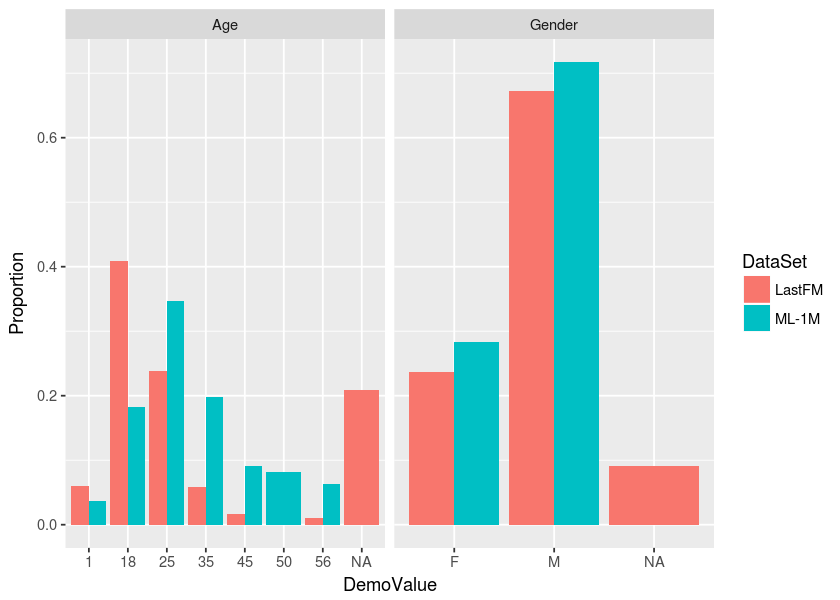

In [67]:
ggplot(everything) +  aes(x=DemoValue,y=Proportion,fill=DataSet) +
geom_bar(stat='identity',position = "dodge")+
    facet_grid(. ~ DemoChar, scales="free")

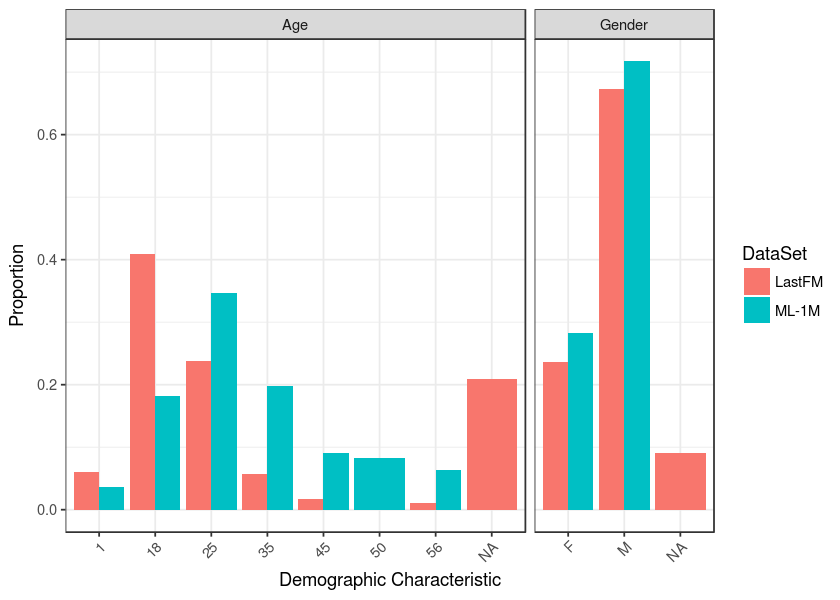

In [76]:
drawplot(file="demo-everything", width=8, height=2.5, {
    ggplot(everything) +  aes(x=DemoValue,y=Proportion, fill=DataSet) +
        geom_bar(stat='identity',position = "dodge") +
        facet_grid(. ~ DemoChar, scales="free", space="free_x") +
        xlab("Demographic Characteristic") +
        theme_bw() +
        theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1))
})

In [70]:
drawplot = function(plot, file=NA, width=5, height=3, ...) {
    if (!is.na(file)) {
        png(paste(file, "png", sep="."), width=width, height=height, units='in', res=600, ...)
        print(plot)
        dev.off()
        pdf(paste(file, "pdf", sep="."), width=width, height=height, ...)
        print(plot)
        dev.off()
    }
    plot
}